In [2]:
# basemap
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


AttributeError: 'AxesSubplot' object has no attribute 'get_axis_bgcolor'

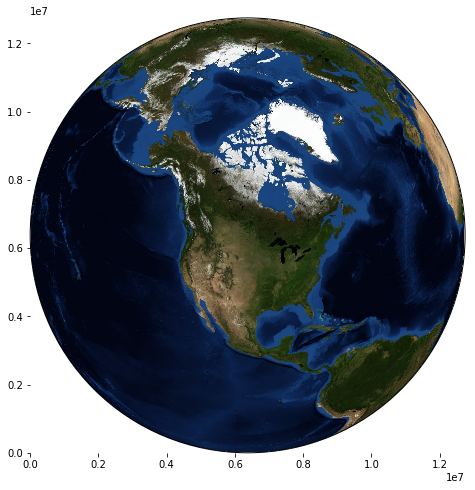

In [9]:
# import warnings

# warnings.filterwarnings('ignore')

plt.figure(figsize=(8, 8))

# ortho -> 正交  resolution -> resolution of boundary database to use
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


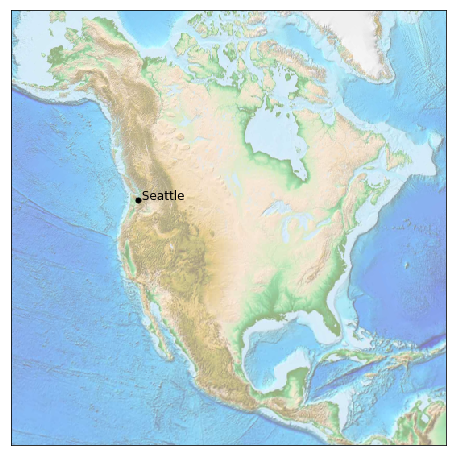

In [11]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None, width=8E6, height=8E6, lat_0=45, lon_0=-100,)

# etopo image -> 地形数据
# draw an etopo relief image as map background
# scale ->      alpha -> transparency
m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
x, y = m(-122.3, 47.6)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Seattle', fontsize=12);

# Map Projections


In [12]:
#  defining a convenience routine to draw our world map along with the longitude and latitude lines:
from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

## Cylindrical projections （圆柱投影）

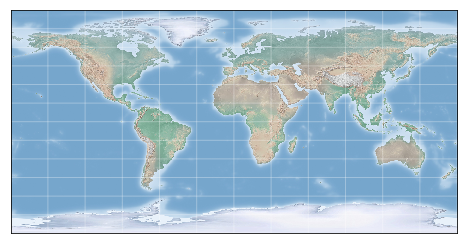

In [16]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
# The additional arguments to Basemap for this view specify the latitude (lat) 
# and longitude (lon) of the lower-left corner (llcrnr) and upper-right corner (urcrnr) for the desired map
m = Basemap(projection='cyl', resolution=None, llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, )
draw_map(m)

## Pseudo-cylindrical projections

AttributeError: 'AxesSubplot' object has no attribute 'get_axis_bgcolor'

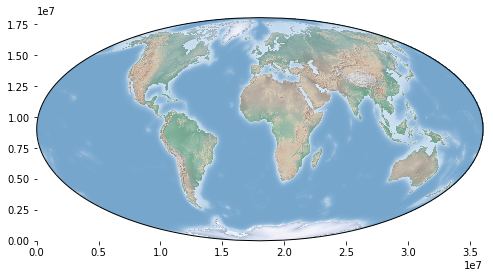

In [20]:
# Other pseudo-cylindrical projections are the sinusoidal (projection='sinu') 
# and Robinson (projection='robin') projections.
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='moll', resolution=None,
            lat_0=0, lon_0=0)
draw_map(m)

## Perspective projections(透视投影；中心投影法)

AttributeError: 'AxesSubplot' object has no attribute 'get_axis_bgcolor'

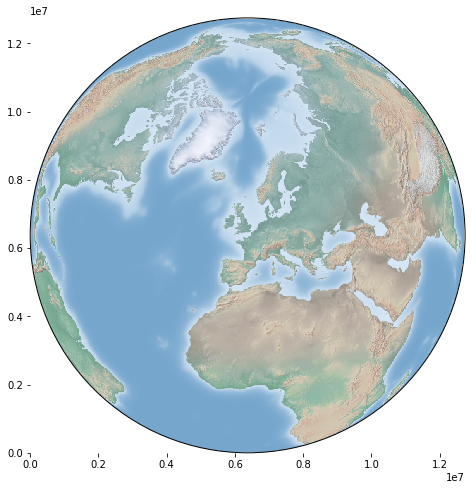

In [22]:
# Other perspective-based projections include the gnomonic projection (projection='gnom') 
# and stereographic projection (projection='stere').
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None,
            lat_0=50, lon_0=0)
draw_map(m);

## Conic projections (圆锥投影)

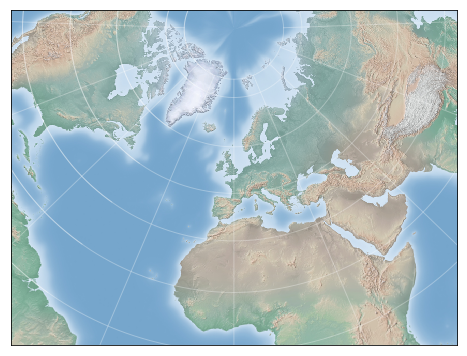

In [23]:
# Other useful conic projections are the equidistant conic projection (projection='eqdc') 
# and the Albers equal-area projection (projection='aea').
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            lon_0=0, lat_0=50, lat_1=45, lat_2=55,
            width=1.6E7, height=1.2E7)
draw_map(m)